<a href="https://colab.research.google.com/github/dhananaidu/branchdemo/blob/master/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
dataset = pd.read_csv('dataset.csv')

In [4]:
dataset.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
dataset.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
dataset.isna().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


<Axes: xlabel='target', ylabel='count'>

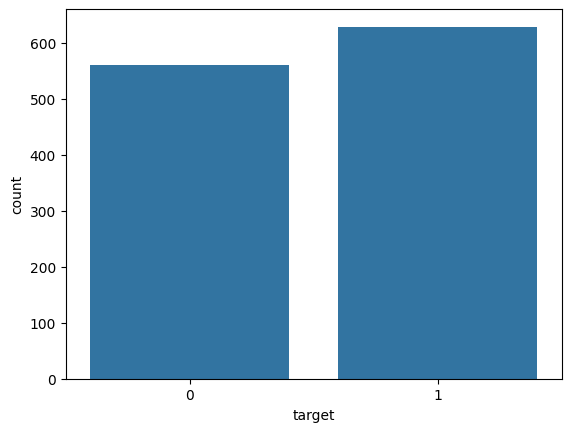

In [7]:
sns.countplot(x = 'target' , data=dataset)

<Axes: >

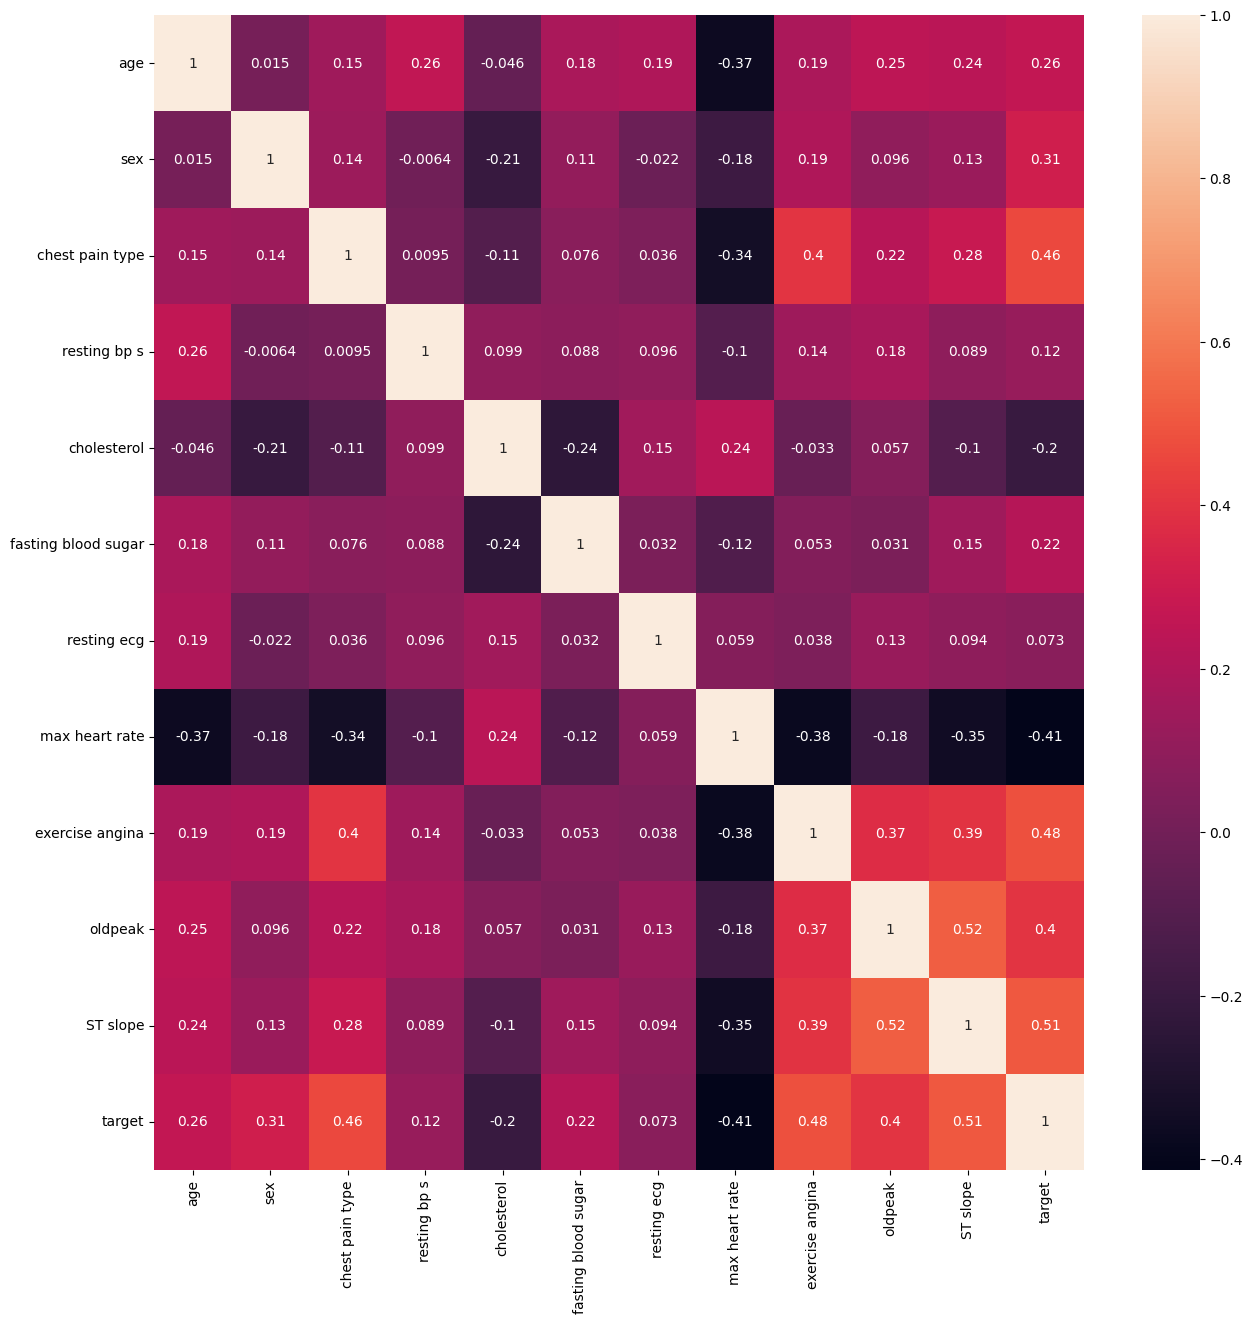

In [10]:
corr_mat = dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat , annot=True)

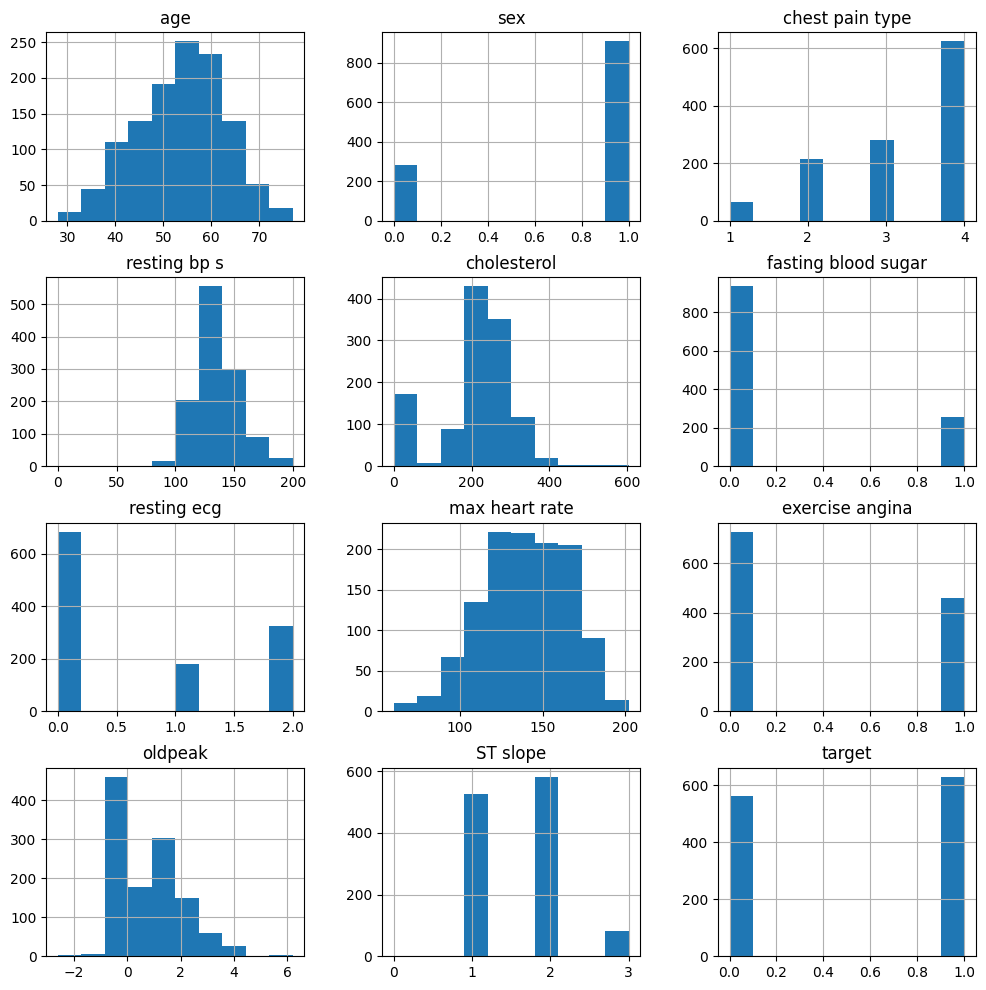

In [11]:
dataset.hist(figsize=(12,12))
plt.show()

In [21]:
dataset2 = pd.get_dummies(dataset , columns=['sex' , 'chest pain type', 'fasting blood sugar' , 'resting ecg' , 'exercise angina' , 'ST slope'])

In [22]:
dataset2.head()

,age,resting bp s,cholesterol,max heart rate,oldpeak,target,sex_0,sex_1,chest pain type_1,chest pain type_2,...,fasting blood sugar_1,resting ecg_0,resting ecg_1,resting ecg_2,exercise angina_0,exercise angina_1,ST slope_0,ST slope_1,ST slope_2,ST slope_3
0,40,140,289,172,0.0,0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,False
1,49,160,180,156,1.0,1,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
2,37,130,283,98,0.0,0,False,True,False,True,...,False,False,True,False,True,False,False,True,False,False
3,48,138,214,108,1.5,1,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
4,54,150,195,122,0.0,0,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False


In [24]:
cols = ['chest pain type_1' , 'chest pain type_2' , 'chest pain type_3' , 'resting bp s' , 'cholesterol' , 'resting ecg_1' , 'resting ecg_2' , 'exercise angina_0' , 'exercise angina_1' , 'max heart rate' , 'ST slope_0' , 'ST slope_1' , 'ST slope_2' , 'ST slope_3']

In [27]:
x = dataset2[cols]
y = dataset2.target

In [28]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state = 42)


In [29]:
x_train.shape


(892, 14)

In [31]:
x_test.shape

(298, 14)

In [32]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
x_train

array([[-0.25384866, -0.47285723, -0.54625895, ...,  1.0990545 ,
        -0.95611876, -0.27093456],
       [-0.25384866,  2.11480321, -0.54625895, ...,  1.0990545 ,
        -0.95611876, -0.27093456],
       [-0.25384866, -0.47285723, -0.54625895, ..., -0.90987299,
         1.04589517, -0.27093456],
       ...,
       [ 3.93935509, -0.47285723, -0.54625895, ..., -0.90987299,
         1.04589517, -0.27093456],
       [-0.25384866, -0.47285723, -0.54625895, ..., -0.90987299,
        -0.95611876,  3.69092818],
       [-0.25384866,  2.11480321, -0.54625895, ...,  1.0990545 ,
        -0.95611876, -0.27093456]])

In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train , y_train)


KNeighborsClassifier()

In [38]:
y_pred = classifier.predict(x_test)

In [39]:
x_test

array([[-0.25384866, -0.47285723, -0.54625895, ..., -0.90987299,
         1.04589517, -0.27093456],
       [-0.25384866, -0.47285723,  1.83063364, ..., -0.90987299,
         1.04589517, -0.27093456],
       [-0.25384866,  2.11480321, -0.54625895, ...,  1.0990545 ,
        -0.95611876, -0.27093456],
       ...,
       [-0.25384866, -0.47285723, -0.54625895, ..., -0.90987299,
         1.04589517, -0.27093456],
       [-0.25384866, -0.47285723, -0.54625895, ...,  1.0990545 ,
        -0.95611876, -0.27093456],
       [-0.25384866, -0.47285723, -0.54625895, ..., -0.90987299,
         1.04589517, -0.27093456]])

In [40]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1])

<Axes: >

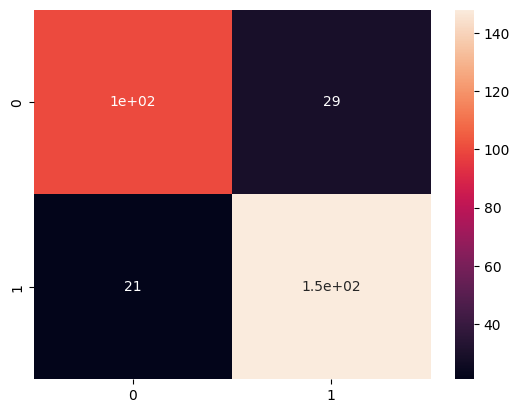

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)


In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.8322147651006712

In [45]:
import pickle
pickle.dump(classifier , open('model.pkl' , 'wb'))
pickle.dump(sc , open('sc.pkl' , 'wb'))